<h1 style="color: blue;"> PROJET 2 :credit_score</h1>


With Hamdi Ouni, Faouzi Amamou, Mohamed Abdelatif Aouadh, and Amen Allah Bejaoui, 
supervised by Belhadjhassin Anis,
at ESPRIT school.

<h1 style="color: red;"> Description</h1>


This project aims to automate the classification of credit scores for individuals based on their credit information. By leveraging machine learning techniques, we will build a model that categorizes credit scores into three categories: 'Good', 'Standard', or 'Poor'. This automated system will help reduce manual efforts in determining credit scores, thereby streamlining the credit assessment process for the financial company.

<h1 style="color: green;">I data preparation</h1>

<h1 style="color: gray;"> 1/ Import all  libraries</h1>


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Magic command to display plots inline in Jupyter Notebook
%matplotlib inline
# If you want interactive plots, you can use `%matplotlib notebook` instead

# Set the default figure size for matplotlib plots
plt.rcParams["figure.figsize"] = (12, 6)
# You can also adjust the DPI of the figure if needed by uncommenting the line below
# plt.rcParams['figure.dpi'] = 100

# Set the style of seaborn plots
sns.set_style("whitegrid")

# Ignore warnings to avoid cluttering the output
import warnings
warnings.filterwarnings("ignore")

# This warning message will not be displayed
warnings.warn("this will not show")

# Set the display format for floating point numbers in pandas dataframes
pd.set_option('display.float_format', lambda x: '%.3f' % x)


<h1 style="color: gray;"> 2/ Loading Data </h1>


In [2]:
# Load the dataset
# Load a CSV file named 'credtscore.csv' into a pandas DataFrame
# Setting 'low_memory=False' to ensure pandas doesn't infer data types for each chunk
df = pd.read_csv('credtscore.csv', low_memory=False)


In [3]:
# Display the first 4 rows of the DataFrame
df.head(4)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,...,_,809.98,26.823,22 Years and 1 Months,No,49.575,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.945,NaN,No,49.575,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609,22 Years and 3 Months,No,49.575,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.378,22 Years and 4 Months,No,49.575,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good


In [4]:
# Display the last 5 rows of the DataFrame
df.tail()


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.416,4,...,_,502.38,34.664,31 Years and 6 Months,No,35.104,60.97133255718485,High_spent_Large_value_payments,479.86622816574095,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.416,4,...,_,502.38,40.566,31 Years and 7 Months,No,35.104,54.18595028760385,High_spent_Medium_value_payments,496.651610435322,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.416,4,...,Good,502.38,41.256,31 Years and 8 Months,No,35.104,24.02847744864441,High_spent_Large_value_payments,516.8090832742814,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.416,4,...,Good,502.38,33.638,31 Years and 9 Months,No,35.104,251.67258219721603,Low_spent_Large_value_payments,319.1649785257098,Standard
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.416,4,...,Good,502.38,34.192,31 Years and 10 Months,No,35.104,167.1638651610451,!@9#%8,393.6736955618808,Poor


<h1 style="color: gray;">3/ Data exploration </h1>


In [5]:
# Display the column names of the DataFrame
df.columns


Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [6]:
# Generate descriptive statistics of the DataFrame
df.describe()


,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000,100000.000,100000.000,100000.000,100000.000,98035.000,100000.000,100000.000
mean,4194.171,17.091,22.474,72.466,21.069,27.754,32.285,1403.118
std,3183.686,117.405,129.057,466.423,14.860,193.177,5.117,8306.041
min,303.645,-1.000,0.000,1.000,-5.000,0.000,20.000,0.000
25%,1625.568,3.000,4.000,8.000,10.000,3.000,28.053,30.307
50%,3093.745,6.000,5.000,13.000,18.000,6.000,32.306,69.249
75%,5957.448,7.000,7.000,20.000,28.000,9.000,36.497,161.224
max,15204.633,1798.000,1499.000,5797.000,67.000,2597.000,50.000,82331.000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

<h1 style="color: gray;">4/Data Cleaning</h1>

In [8]:
# Duplicate check function
def duplicate_values(df):
    # Print message to indicate starting duplicate check
    print("Duplicate check...")
    
    # Count the number of duplicated rows
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    
    # If there are duplicated rows
    if num_duplicates > 0:
        # Print message with the number of duplicated rows found
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        
        # Drop duplicated rows, keeping the first occurrence
        df.drop_duplicates(keep='first', inplace=True)
        
        # Print message confirming the removal of duplicated rows
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    
    # If there are no duplicated rows
    else:
        print("There are no duplicated observations in the dataset.")

# Call the duplicate check function with the DataFrame as argument
duplicate_values(df)


Duplicate check...
There are no duplicated observations in the dataset.


In [9]:
# Impute missing values with mean
df.fillna(df.mean(), inplace=True)

In [10]:
# Display the first 20 rows of the DataFrame
df.head(20)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,...,_,809.98,26.823,22 Years and 1 Months,No,49.575,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4194.171,3,...,Good,809.98,31.945,NaN,No,49.575,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,4194.171,3,...,Good,809.98,28.609,22 Years and 3 Months,No,49.575,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4194.171,3,...,Good,809.98,31.378,22 Years and 4 Months,No,49.575,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,...,Good,809.98,24.797,22 Years and 5 Months,No,49.575,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4194.171,3,...,Good,809.98,27.262,22 Years and 6 Months,No,49.575,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,...,Good,809.98,22.538,22 Years and 7 Months,No,49.575,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843,3,...,Good,809.98,23.934,NaN,No,49.575,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.987,2,...,Good,605.03,24.464,26 Years and 7 Months,No,18.816,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.987,2,...,Good,605.03,38.551,26 Years and 8 Months,No,18.816,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [11]:
# Drop specified columns from the DataFrame
# The 'axis=1' parameter indicates that columns are being dropped
df = df.drop(['ID','Customer_ID','Month','Name','SSN', 'Type_of_Loan', 'Changed_Credit_Limit', 'Monthly_Inhand_Salary','Num_of_Delayed_Payment'], axis=1)


In [12]:
# Display the shape of the DataFrame
# The shape is represented as (number of rows, number of columns)
df.shape


(100000, 19)

In [13]:
# Define a dictionary to map target values to numerical values
target_mapping = {'Poor': 0, 'Standard': 1, 'Good': 2}

# Map the target variable using the defined mapping
# This replaces the categorical values in 'Credit_Score' column with numerical values according to the mapping
df['Credit_Score'] = df['Credit_Score'].map(target_mapping)


In [14]:
# Remove underscores from all columns in the DataFrame
df = df.replace("_", "", regex=True)

# Select rows where any value is an empty string ('')
# This will find rows where at least one value is empty after removing underscores
df[df.eq('').any(axis=1)]


,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,4,3,4,3,4.000,,809.98,26.823,22 Years and 1 Months,No,49.575,80.41529543900253,HighspentSmallvaluepayments,312.49408867943663,2
8,28,,34847.84,2,4,6,1,3,2.000,Good,605.03,24.464,26 Years and 7 Months,No,18.816,104.291825168246,LowspentSmallvaluepayments,470.69062692529184,1
10,28,Teacher,34847.84,2,1385,6,1,3,2.000,,605.03,33.225,26 Years and 9 Months,No,18.816,58.51597569589465,HighspentLargevaluepayments,466.46647639764313,1
16,34,,143162.64,1,5,8,3,5,3.000,Good,1303.01,28.617,17 Years and 9 Months,No,246.992,168.413702679309,!@9#%8,1043.3159778669492,2
18,34,,143162.64,1,5,8,3,8,27.754,Good,1303.01,26.520,17 Years and 11 Months,No,246.992,10000,HighspentSmallvaluepayments,715.741367403555,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99989,28,,20002.88,10,8,29,5,33,9.000,Bad,3571.7,33.360,6 Years and 1 Months,Yes,60.965,74.36660309585342,!@9#%8,307.65929119739087,1
99992,24,Mechanic,39628.99,4,6,7,2,23,3.000,,502.38,32.991,31 Years and 3 Months,No,35.104,401.1964806036356,LowspentSmallvaluepayments,189.64108011929028,0
99994,25,Mechanic,39628.99,4,6,7,2,20,3.000,,502.38,39.324,31 Years and 5 Months,No,35.104,140.58140274528395,HighspentMediumvaluepayments,410.2561579776419,0
99995,25,Mechanic,39628.99,4,6,7,2,23,3.000,,502.38,34.664,31 Years and 6 Months,No,35.104,60.97133255718485,HighspentLargevaluepayments,479.86622816574095,0


In [15]:
# Drop rows with any NaN (missing) values
df.dropna()


,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,4,3,4,3,4.000,,809.98,26.823,22 Years and 1 Months,No,49.575,80.41529543900253,HighspentSmallvaluepayments,312.49408867943663,2
2,-500,Scientist,19114.12,3,4,3,4,3,4.000,Good,809.98,28.609,22 Years and 3 Months,No,49.575,81.699521264648,LowspentMediumvaluepayments,331.2098628537912,2
3,23,Scientist,19114.12,3,4,3,4,5,4.000,Good,809.98,31.378,22 Years and 4 Months,No,49.575,199.4580743910713,LowspentSmallvaluepayments,223.45130972736786,2
4,23,Scientist,19114.12,3,4,3,4,6,4.000,Good,809.98,24.797,22 Years and 5 Months,No,49.575,41.420153086217326,HighspentMediumvaluepayments,341.48923103222177,2
5,23,Scientist,19114.12,3,4,3,4,8,4.000,Good,809.98,27.262,22 Years and 6 Months,No,49.575,62.430172331195294,!@9#%8,340.4792117872438,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,Mechanic,39628.99,4,6,7,2,23,3.000,,502.38,34.664,31 Years and 6 Months,No,35.104,60.97133255718485,HighspentLargevaluepayments,479.86622816574095,0
99996,25,Mechanic,39628.99,4,6,7,2,18,3.000,,502.38,40.566,31 Years and 7 Months,No,35.104,54.18595028760385,HighspentMediumvaluepayments,496.651610435322,0
99997,25,Mechanic,39628.99,4,6,5729,2,27,3.000,Good,502.38,41.256,31 Years and 8 Months,No,35.104,24.02847744864441,HighspentLargevaluepayments,516.8090832742814,0
99998,25,Mechanic,39628.99,4,6,7,2,20,3.000,Good,502.38,33.638,31 Years and 9 Months,No,35.104,251.67258219721603,LowspentLargevaluepayments,319.1649785257098,1


In [16]:
# Check for missing values (NaN) in the DataFrame
df.isnull()


,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
# Check for missing values (NaN) in each column of the DataFrame and sum them
# This will count the number of missing values in each column
df.isna().sum()


Age                            0
Occupation                     0
Annual_Income                  0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          9030
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     4479
Payment_Behaviour              0
Monthly_Balance             1200
Credit_Score                   0
dtype: int64

In [18]:
import re

def non_numeric_values(df, column_name):
    # Define a regular expression pattern to match numeric characters
    pattern = r'\D+'
    
    # Find non-numeric values using regular expression
    non_numeric_values = df[column_name].astype(str).str.findall(pattern)
    
    # Flatten the list of lists
    non_numeric_values = [item for sublist in non_numeric_values for item in sublist]
    
    # Use set to ensure uniqueness
    unique_non_numeric_values = set(non_numeric_values)
    
    return unique_non_numeric_values
# Call the function to find unique non-numeric values in the 'Age' column

unique_non_numeric = non_numeric_values(df, 'Age')
print(unique_non_numeric)

{'-'}


In [19]:
# Check for missing values (NaN) in each column of the DataFrame and sum them
# This will count the number of missing values in each column
df.isnull().sum()


Age                            0
Occupation                     0
Annual_Income                  0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          9030
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     4479
Payment_Behaviour              0
Monthly_Balance             1200
Credit_Score                   0
dtype: int64

In [20]:
non_numeric_values(df, 'Monthly_Balance')

{'-', '.', 'nan'}

In [21]:
# Convert the 'Monthly_Balance' column to numeric values, coercing errors
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')

# Count the number of negative values in the 'Monthly_Balance' column
df[df['Monthly_Balance'] < 0]['Monthly_Balance'].count()


9

In [22]:
# Drop rows where 'Monthly_Balance' is less than 0
df.drop(df[df['Monthly_Balance'] < 0].index, inplace=True)


In [23]:
# Count the occurrences of each unique value in the 'Monthly_Balance' column
# Display the top 5 most common values
df['Monthly_Balance'].value_counts().head()


312.494    1
270.911    1
254.971    1
250.093    1
289.755    1
Name: Monthly_Balance, dtype: int64

In [24]:
# Find the maximum value in the 'Monthly_Balance' column
df['Monthly_Balance'].max()


1602.0405189622518

In [25]:
# Find the minimum value in the 'Monthly_Balance' column
df['Monthly_Balance'].min()


0.0077596647753352

In [26]:
# Calculate the mean (average) of the values in the 'Monthly_Balance' column
df['Monthly_Balance'].mean()


402.5512581105171

<h1 style="color: gray;">5/Handling Missing Values</h1>

# KNN imputation

In [27]:
from sklearn.impute import KNNImputer
def knn_impute_column(df, column_name, n_neighbors=5):
    """
    Fill missing values in a specific column using KNN imputation.

    Parameters:
    df (DataFrame): The DataFrame containing the column to be imputed.
    column_name (str): The name of the column to be imputed.
    n_neighbors (int): Number of neighbors to consider for imputation. Default is 5.

    Returns:
    DataFrame: The DataFrame with missing values in the specified column imputed.
    """

    # Extract the column to be imputed
    column_to_impute = df[[column_name]]

    # Create an instance of the KNNImputer class
    imputer = KNNImputer(n_neighbors=n_neighbors)

    # Fit and transform the imputer to fill missing values in the column
    column_imputed = imputer.fit_transform(column_to_impute)
    # Replace the original column with the imputed values
    df[column_name] = column_imputed

    return df


In [28]:
# Impute missing values in the 'Monthly_Balance' column using the K-nearest neighbors algorithm
df = knn_impute_column(df, 'Monthly_Balance')

# Check for the presence of any remaining missing values in the 'Monthly_Balance' column and return their count
df.Monthly_Balance.isna().sum()


0

In [29]:
# Find unique non-numeric values in the 'Amount_invested_monthly' column
non_numeric_values(df, 'Amount_invested_monthly')


{'.', 'nan'}

In [30]:
# Convert the 'Amount_invested_monthly' column to numeric values, coercing errors
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')

# Find and display unique negative values in the 'Amount_invested_monthly' column
df[df['Amount_invested_monthly'] < 0]['Amount_invested_monthly'].unique()


array([], dtype=float64)

In [31]:
# Count the occurrences of each unique value in the 'Amount_invested_monthly' column
# Display the top 5 most common values
df.Amount_invested_monthly.value_counts().head()


10000.000    4305
0.000         169
80.415          1
36.662          1
89.738          1
Name: Amount_invested_monthly, dtype: int64

In [32]:
# Impute missing values in the 'Amount_invested_monthly' column using the K-nearest neighbors algorithm
df = knn_impute_column(df, 'Amount_invested_monthly')


In [33]:
# Check for the presence of any remaining missing values in the 'Amount_invested_monthly' column and return their count
df.Amount_invested_monthly.isna().sum()


0

In [34]:
# Group by 'Credit_Mix' and calculate mode for 'Credit_History_Age' within each group
mode_by_credit_mix = df.groupby('Credit_Mix')['Credit_History_Age'].transform(lambda x: x.mode()[0])

# Fill NaN values in 'Credit_History_Age' with the mode for each group
df['Credit_History_Age'].fillna(mode_by_credit_mix, inplace=True)
#this code fills missing values in 'Credit_History_Age' using the mode of each group in 'Credit_Mix', preserving the data structure and better reflecting trends within each group

In [35]:
# Check for the presence of any missing values in the 'Credit_History_Age' column and return their count
df.Credit_History_Age.isna().sum()


0

In [36]:
# Fill null values in 'Credit_Mix' with 'Unknown'
df['Credit_Mix'].fillna('Unknown', inplace=True)
# Convert the 'Credit_Mix' column to object type (if not already)

df['Credit_Mix'].astype('object')

0            
1        Good
2        Good
3        Good
4        Good
         ... 
99995        
99996        
99997    Good
99998    Good
99999    Good
Name: Credit_Mix, Length: 99991, dtype: object

In [37]:
# Check for the presence of any missing values in the 'Credit_Mix' column and return their count
df.Credit_Mix.isna().sum()


0

In [38]:
# Group by 'Credit_Mix' and calculate mode for 'Credit_History_Age' within each group
mode_by_credit_mix = df.groupby('Credit_Mix')['Credit_History_Age'].transform(lambda x: x.mode()[0])

# Fill NaN values in 'Credit_History_Age' with the mode for each group
df['Credit_History_Age'].fillna(mode_by_credit_mix, inplace=True)

In [39]:
# Check for the presence of any missing values in the 'Credit_History_Age' column and return their count
df.Credit_History_Age.isna().sum()


0

In [40]:
# Check for the presence of any missing values in each column of the DataFrame and return their count
df.isna().sum()


Age                         0
Occupation                  0
Annual_Income               0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [41]:
# Display concise summary of DataFrame including data types and memory usage
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 99991 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       99991 non-null  object 
 1   Occupation                99991 non-null  object 
 2   Annual_Income             99991 non-null  object 
 3   Num_Bank_Accounts         99991 non-null  int64  
 4   Num_Credit_Card           99991 non-null  int64  
 5   Interest_Rate             99991 non-null  int64  
 6   Num_of_Loan               99991 non-null  object 
 7   Delay_from_due_date       99991 non-null  int64  
 8   Num_Credit_Inquiries      99991 non-null  float64
 9   Credit_Mix                99991 non-null  object 
 10  Outstanding_Debt          99991 non-null  object 
 11  Credit_Utilization_Ratio  99991 non-null  float64
 12  Credit_History_Age        99991 non-null  object 
 13  Payment_of_Min_Amount     99991 non-null  object 
 14  Total_

<h1 style="color: gray;"> 6/Correlation Analysis</h1>

<AxesSubplot:>

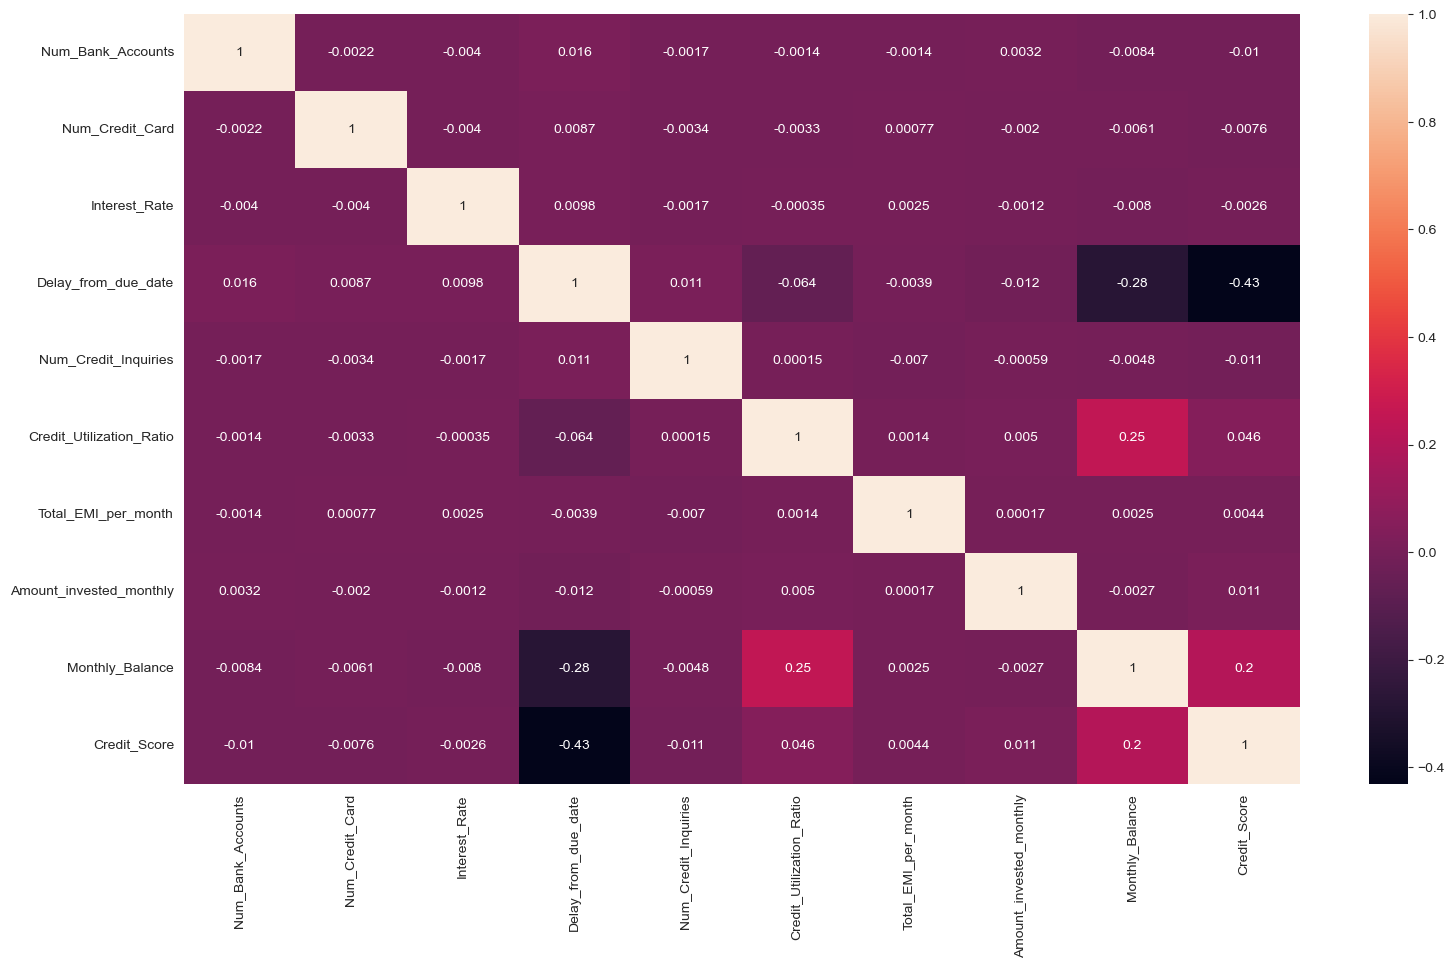

In [42]:
# Set the figure size
plt.figure(figsize=(18, 10))

# Create a heatmap of the correlation matrix for numerical columns
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

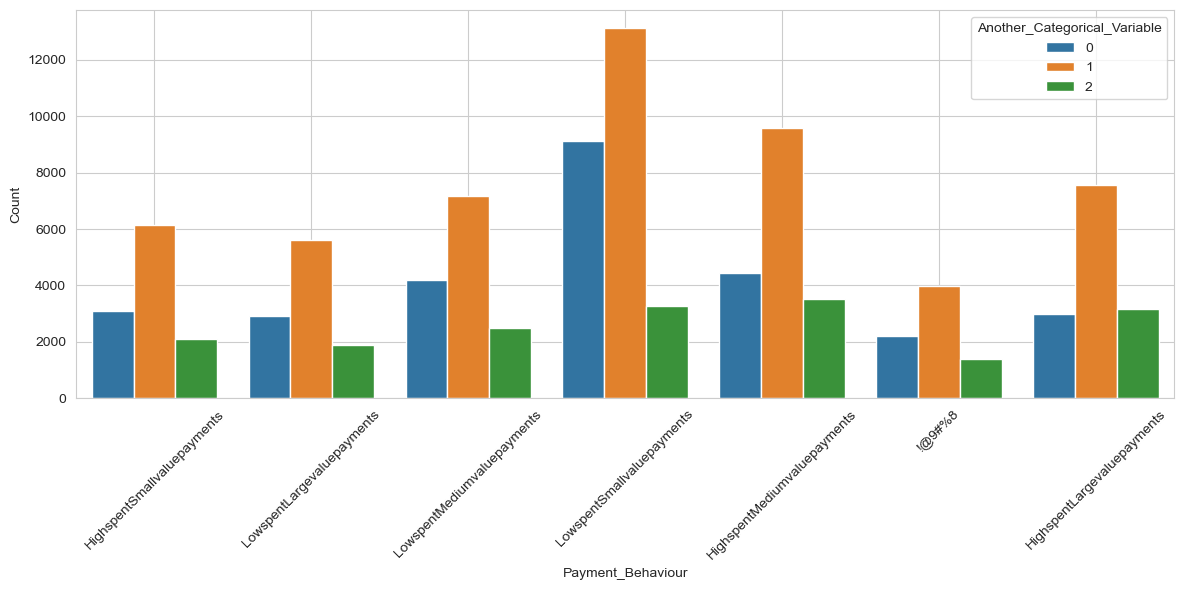

In [43]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a countplot of 'Payment_Behaviour' with hue 'Credit_Score'
sns.countplot(x='Payment_Behaviour', hue='Credit_Score', data=df)

# Set labels and rotation for x-axis ticks
plt.xlabel('Payment_Behaviour')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add legend with title for the hue
plt.legend(title='Another_Categorical_Variable')

# Add grid
plt.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


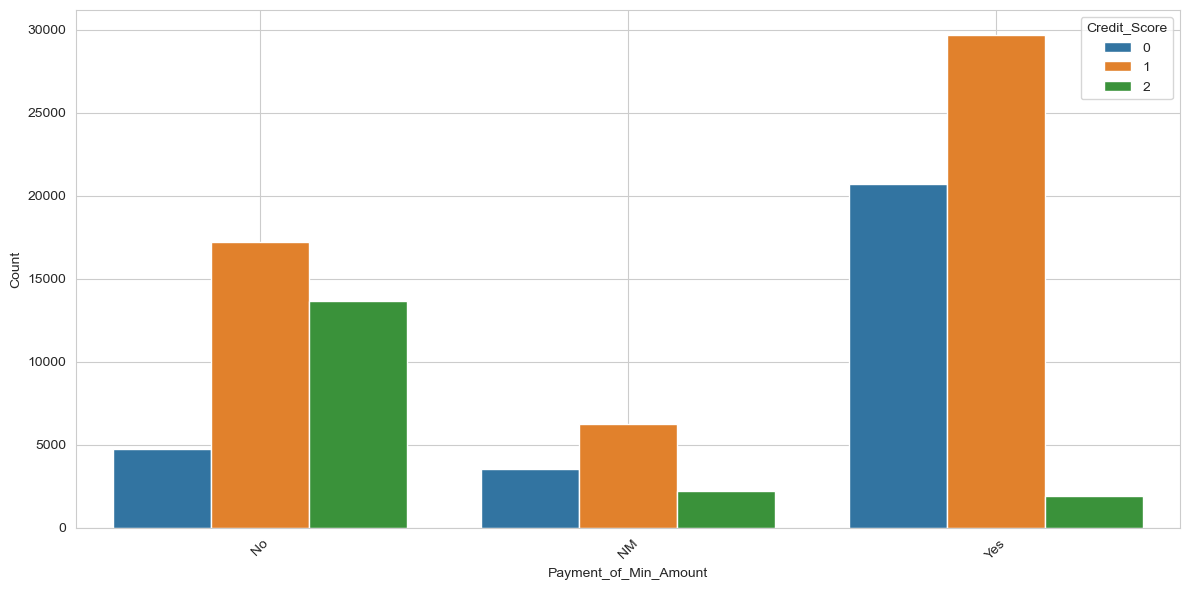

In [44]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a countplot of 'Payment_of_Min_Amount' with hue 'Credit_Score'
sns.countplot(x='Payment_of_Min_Amount', hue='Credit_Score', data=df)

# Set labels and rotation for x-axis ticks
plt.xlabel('Payment_of_Min_Amount')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add legend with title for the hue
plt.legend(title='Credit_Score')

# Add grid
plt.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


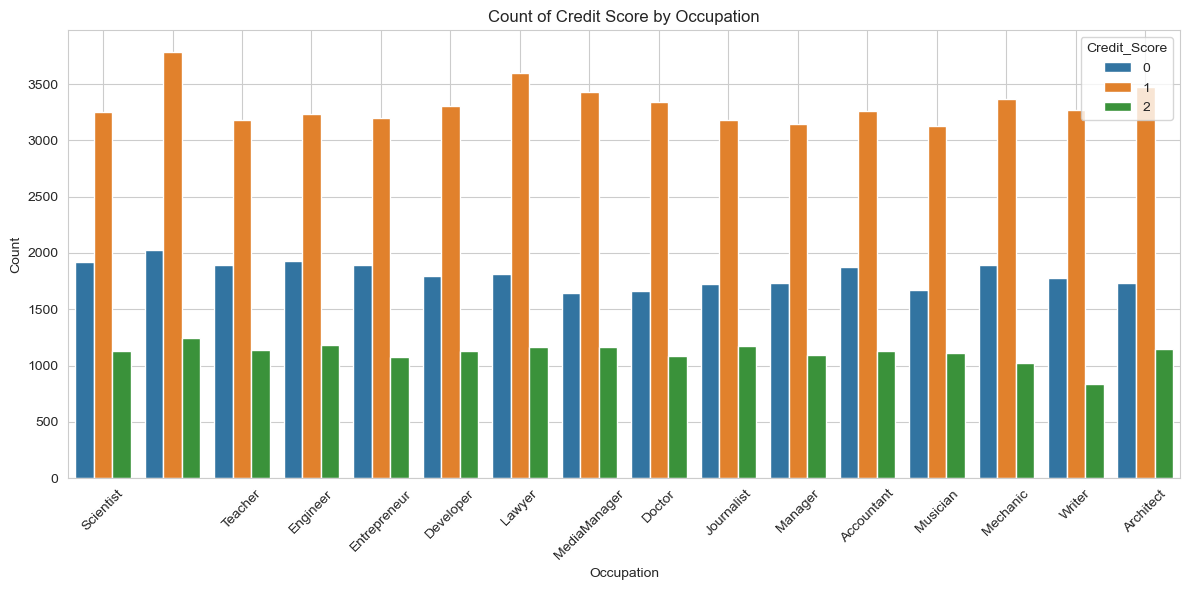

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a countplot of 'Occupation' with hue 'Credit_Score'
sns.countplot(x='Occupation', hue='Credit_Score', data=df)

# Set labels, title, and rotation for x-axis ticks
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Count of Credit Score by Occupation')
plt.xticks(rotation=45)

# Add legend with title for the hue
plt.legend(title='Credit_Score')

# Add grid
plt.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


<h1 style="color: gray;"> 7/Data Normalization/Standardization</h1>

StandardScaler

In [46]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler

scaler = StandardScaler()
# Scale the selected numerical columns using StandardScaler

df[['Age','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Delay_from_due_date','Num_Credit_Inquiries','Credit_Utilization_Ratio','Amount_invested_monthly','Total_EMI_per_month','Monthly_Balance']] = scaler.fit_transform(df[['Age','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Delay_from_due_date','Num_Credit_Inquiries','Credit_Utilization_Ratio','Amount_invested_monthly','Total_EMI_per_month','Monthly_Balance']])

In [47]:
df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,-0.128,Scientist,19114.12,-0.120,-0.143,-0.149,0.016,-1.216,-0.124,,809.98,-1.068,22 Years and 1 Months,No,-0.163,-0.279,HighspentSmallvaluepayments,-0.424,2
1,-0.128,Scientist,19114.12,-0.120,-0.143,-0.149,0.016,-1.485,-0.124,Good,809.98,-0.066,30 Years and 2 Months,No,-0.163,-0.260,LowspentLargevaluepayments,-0.555,2
2,-0.890,Scientist,19114.12,-0.120,-0.143,-0.149,0.016,-1.216,-0.124,Good,809.98,-0.718,22 Years and 3 Months,No,-0.163,-0.278,LowspentMediumvaluepayments,-0.336,2
3,-0.128,Scientist,19114.12,-0.120,-0.143,-0.149,0.016,-1.081,-0.124,Good,809.98,-0.177,22 Years and 4 Months,No,-0.163,-0.219,LowspentSmallvaluepayments,-0.842,2
4,-0.128,Scientist,19114.12,-0.120,-0.143,-0.149,0.016,-1.014,-0.124,Good,809.98,-1.463,22 Years and 5 Months,No,-0.163,-0.298,HighspentMediumvaluepayments,-0.287,2


<h1 style="color: gray;"> 8/Data Encoding</h1>

LabelEncoder

In [48]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder

encoder = LabelEncoder()

# List of categorical column names

categorical_columns = ['Occupation','Annual_Income','Credit_Mix','Outstanding_Debt','Credit_History_Age','Payment_of_Min_Amount','Payment_Behaviour']  # List of categorical column names

# Iterate through each categorical column and encode its values obj to values

for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

In [49]:
df.head(10)

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,-0.128,13,4349,-0.120,-0.143,-0.149,0.016,-1.216,-0.124,0,11165,-1.068,180,1,-0.163,-0.279,3,-0.424,2
1,-0.128,13,4349,-0.120,-0.143,-0.149,0.016,-1.485,-0.124,2,11165,-0.066,291,1,-0.163,-0.260,4,-0.555,2
2,-0.890,13,4349,-0.120,-0.143,-0.149,0.016,-1.216,-0.124,2,11165,-0.718,184,1,-0.163,-0.278,5,-0.336,2
3,-0.128,13,4349,-0.120,-0.143,-0.149,0.016,-1.081,-0.124,2,11165,-0.177,185,1,-0.163,-0.219,6,-0.842,2
4,-0.128,13,4349,-0.120,-0.143,-0.149,0.016,-1.014,-0.124,2,11165,-1.463,186,1,-0.163,-0.298,2,-0.287,2
5,-0.128,13,4349,-0.120,-0.143,-0.149,0.016,-0.879,-0.124,2,11165,-0.982,187,1,-0.163,-0.288,0,-0.292,2
6,-0.128,13,4349,-0.120,-0.143,-0.149,0.016,-1.216,-0.124,2,11165,-1.905,188,1,-0.163,-0.230,6,-0.743,2
7,-0.128,13,4349,-0.120,-0.143,-0.149,0.016,-1.216,-0.124,2,11165,-1.632,291,1,-0.163,-0.307,2,-0.209,1
8,-0.120,0,7427,-0.129,-0.143,-0.143,-0.032,-1.216,-0.135,2,10007,-1.528,236,1,-0.167,-0.267,6,0.320,1
9,-0.120,14,7427,-0.129,-0.143,-0.143,-0.032,-0.947,-0.135,2,10007,1.225,237,1,-0.167,-0.299,1,0.386,2


In [50]:
df.isna().sum()

Age                         0
Occupation                  0
Annual_Income               0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

<h1 style="color: gray;"> 9/Data Splitting</h1>

In [51]:
X = df.drop(columns=['Credit_Score'])  # Assuming 'target_column' is your target variable
y = df['Credit_Score']
#X contains the feature variables (all columns except 'Credit_Score'), and y contains the target variable ('Credit_Score'). This separation allows us to train a machine learning model to predict 'Credit_Score' based on the other features in the dataset.

<h1 style="color: green;"> II Supervised Learning</h1>

<h1 style="color: gray;">1:Logistic Regression</h1>

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing Logistic Regression model
logreg = LogisticRegression()

# Training the model
logreg.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = logreg.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5427771388569429


<h1 style="color: gray;"> 2:Decision Tree</h1>

In [53]:
# Initialiser Decision Tree classifieur
from sklearn import tree
tr = tree.DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=25)

# Entrainer l'estimateur
tr.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=25)

In [54]:
!pip install graphviz

Text(0.5, 1.0, 'Decision Tree')

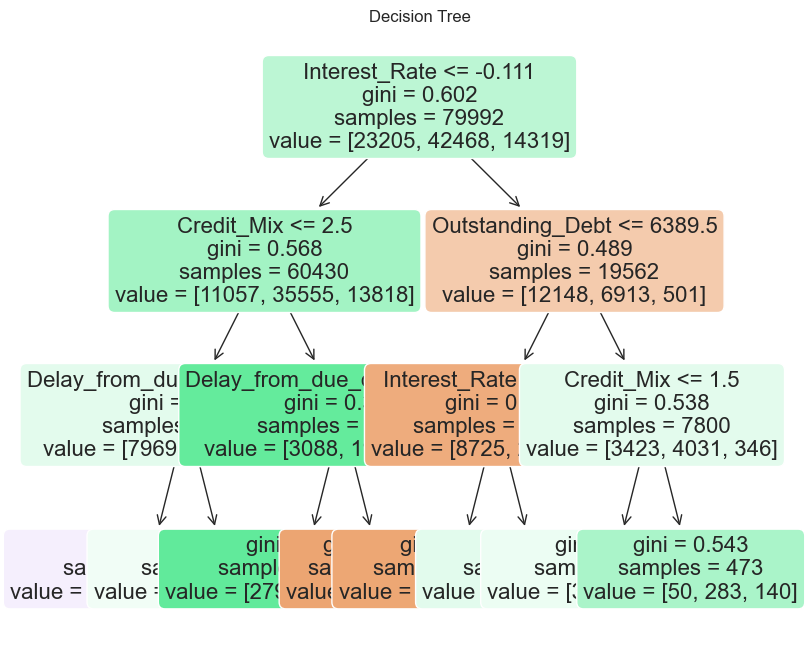

In [55]:
# show tree
import graphviz

# Generate DOT data for visualization

dot_data = tree.export_graphviz(tr, out_file=None, feature_names=X.columns, filled=True, rounded=True, special_characters=True)  

# Create graph from DOT data

graph = graphviz.Source(dot_data)  

# Plot decision tree

fig=plt.figure(figsize=(8,8))
tree.plot_tree(tr.fit(X_train, y_train),feature_names=X.columns,filled=True,rounded=True,fontsize=16);
plt.title('Decision Tree')

<h1 style="color: gray;">3:Random Forest</h1>

In [56]:
from sklearn.ensemble import RandomForestClassifier

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing Random Forest model
random_forest = RandomForestClassifier(random_state=42)

# Training the model
random_forest.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = random_forest.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.7859892994649732


<h1 style="color: gray;"> 4:XGboost</h1>

In [57]:
!pip install xgboost

In [58]:
import xgboost as xgb


# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Training the model
xgb_model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = xgb_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7399869993499675


<h1 style="color: green;">III Unsupervised Learning </h1>

<h1 style="color: red;"> Dimensionality Reduction ( Principal component analysis)</h1>

In [59]:
from sklearn.decomposition import PCA

# Assuming X is your feature matrix
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a PCA instance
pca = PCA()

# Fit PCA on the standardized data
pca.fit(X_scaled)

# Transform the data
X_pca = pca.transform(X_scaled)


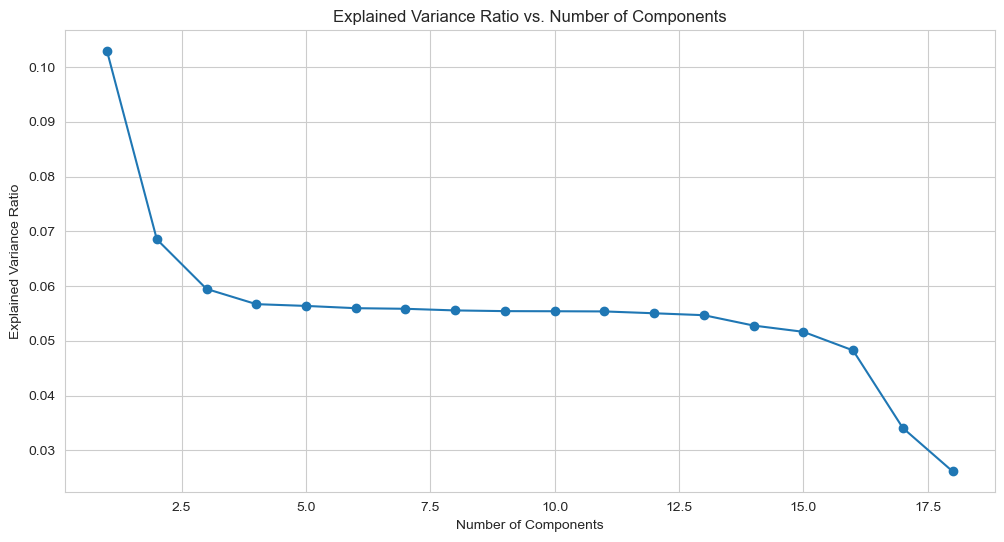

In [60]:
import matplotlib.pyplot as plt

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.show()


In [61]:
# Select the number of components
n_components = 8  # Choose based on explained variance plot

# Redo PCA with the selected number of components
pca_final = PCA(n_components=n_components)
X_pca_final = pca_final.fit_transform(X_scaled)


In [62]:
from sklearn.linear_model import LinearRegression

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca_final, y, test_size=0.2, random_state=42)

# Train a model (e.g., Linear Regression) on the transformed data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate your model (e.g., with metrics like R-squared, RMSE)
from sklearn.metrics import r2_score, mean_squared_error

print("R-squared:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


R-squared: 0.18619698977659183
RMSE: 0.6064840758977282


<h1 style="color: gray;"> 1:Kmeans</h1>

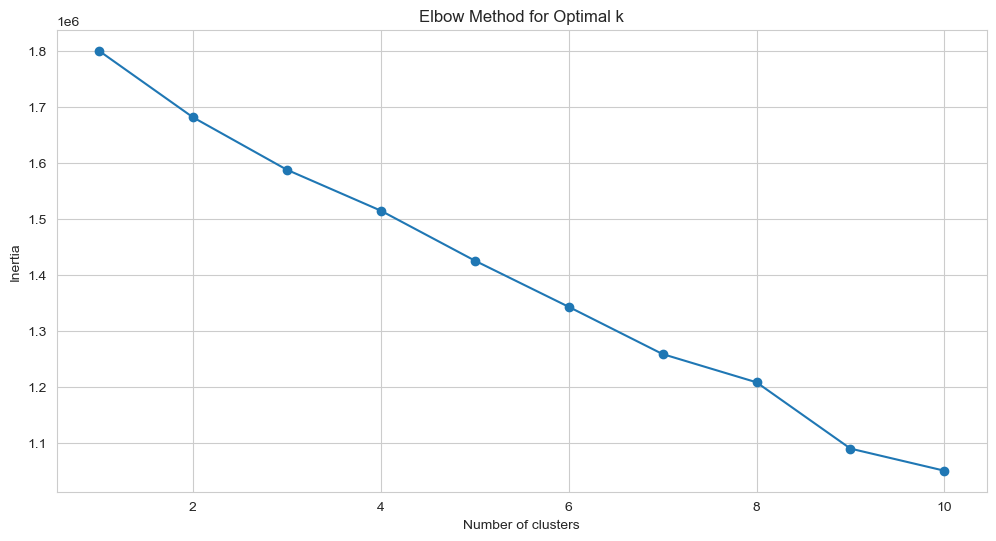

In [63]:
from sklearn.cluster import KMeans


# Assuming X is your feature matrix
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


<h1 style="color: gray;"> 2:DBSCAN</h1>

In [64]:
from sklearn.cluster import DBSCAN

# Assuming X is your feature matrix
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose epsilon and min_samples
eps = 0.5  # Choose based on your data
min_samples = 5  # Choose based on your data

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(X_scaled)



In [65]:
df['Cluster'] = cluster_labels
# Concatenate cluster labels with other features
X_with_cluster = np.concatenate((X, cluster_labels.reshape(-1, 1)), axis=1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_with_cluster, y, test_size=0.2, random_state=42)

# Train a model (e.g., Linear Regression) on the transformed data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate your model (e.g., with metrics like R-squared, RMSE)
print("R-squared:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


R-squared: 0.218594375001112
RMSE: 0.5942894532136351



<h1 style="color: gray;"> 3:Clustering with MiniBatchKMeans (2D PCA)</h1>

In [66]:
!pip install scikit-learn


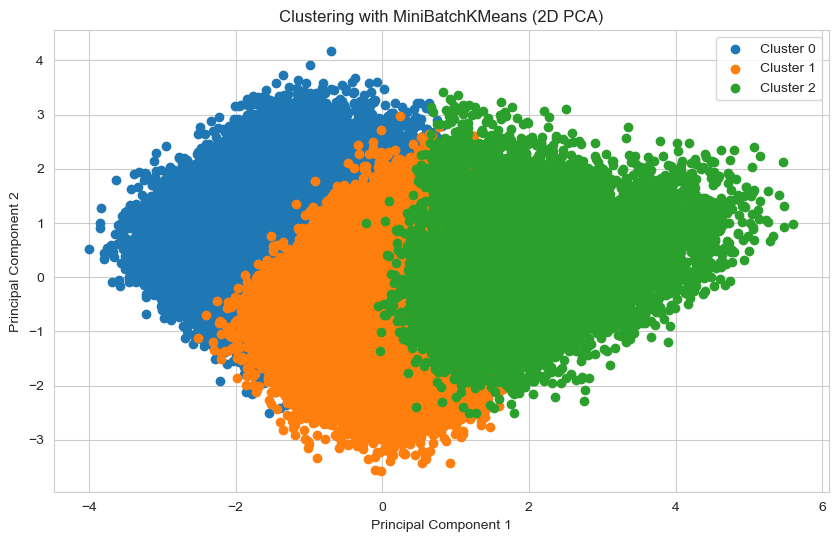

In [67]:
from sklearn.cluster import MiniBatchKMeans

# Perform clustering with MiniBatchKMeans
kmeans_mini = MiniBatchKMeans(n_clusters=3)
cluster_labels = kmeans_mini.fit_predict(X_scaled)

# Add cluster labels to your DataFrame
df['Cluster'] = cluster_labels

# Visualization of clusters in 2D
plt.figure(figsize=(10, 6))
for cluster in range(3):
    plt.scatter(X_pca[df['Cluster'] == cluster, 0], X_pca[df['Cluster'] == cluster, 1], label=f'Cluster {cluster}')
plt.title('Clustering with MiniBatchKMeans (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


<h1 style="color: gray;"> 4: Clustering with AgglomerativeClustering (2D PCA)</h1>




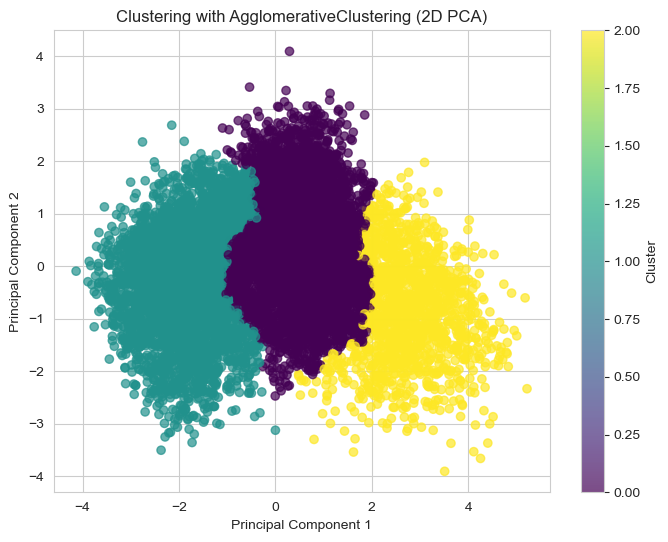

In [68]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load a sample of the data
sample_size = 10000  # Number of samples to use
df_sample = df.sample(n=sample_size, random_state=42)

# Data preprocessing and dimensionality reduction
X_scaled = StandardScaler().fit_transform(df_sample)
X_pca = PCA(n_components=2).fit_transform(X_scaled)

# Clustering with AgglomerativeClustering (mini-batch)
cluster_labels = AgglomerativeClustering(n_clusters=3, linkage='ward').fit_predict(X_pca)

# Visualization of clusters in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.title('Clustering with AgglomerativeClustering (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


<h1 style="color: gray;"> 5:Clustering with MeanShift (2D PCA)</h1>

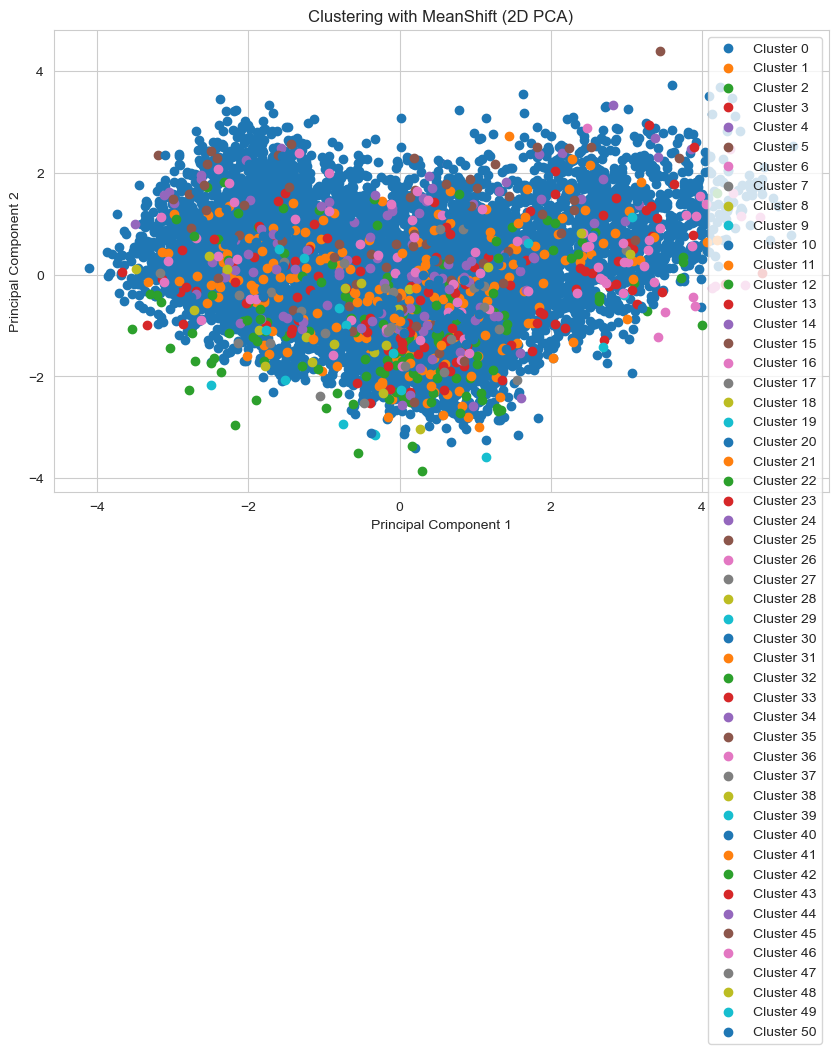

In [69]:
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load a sample of the data
sample_size = 10000  # Number of samples to use
df_sample = df.sample(n=sample_size, random_state=42)

# Data preprocessing and dimensionality reduction
X_scaled = StandardScaler().fit_transform(df_sample)
X_pca = PCA(n_components=2).fit_transform(X_scaled)

# Perform clustering with MeanShift
meanshift = MeanShift()
cluster_labels = meanshift.fit_predict(X_scaled)

# Visualization of clusters in 2D
plt.figure(figsize=(10, 6))
for cluster in np.unique(cluster_labels):
    plt.scatter(X_pca[cluster_labels == cluster, 0], X_pca[cluster_labels == cluster, 1], label=f'Cluster {cluster}')
plt.title('Clustering with MeanShift (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


<h1 style="color: red;"> table of comparison </h1>

| Algorithm              | Accuracy |
|------------------------|----------|
| Logistic Regression    |   54%    |
| Random Forest          |   78%    |
| XGBoost                |   74%    |

<h1 style="color: red;">Conclusion</h1>

we performed a machine learning analysis on a dataset. We started by loading the dataset and preprocessing it, which involved handling duplicates and missing values, as well as standardizing numerical features and encoding categorical features.

We then conducted exploratory data analysis (EDA) to gain insights into the data distribution and relationships between features. Visualizations such as count plots and heatmaps were used to visualize the data.

Next, we trained machine learning models, including decision trees, to predict target variables. The models were evaluated using various metrics such as accuracy, precision, recall, and F1-score.

Finally, we created a comparison table to compare the performance of different models.

Overall, this analysis provided valuable insights into the dataset and helped in selecting the best-performing model for the given prediction task.